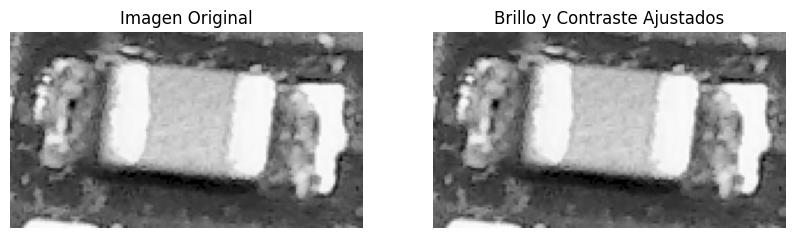

In [539]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para modificar brillo y contraste
def ajustar_brillo_contraste(imagen, alpha=1.5, beta=50):
    """
    Ajusta el brillo y contraste de la imagen.
    - alpha: Factor de contraste (>1 aumenta el contraste, <1 lo reduce).
    - beta: Aumenta o reduce el brillo (valores positivos lo aclaran, negativos lo oscurecen).
    """
    imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)
    return imagen_ajustada

# Ruta de la imagen
ruta_imagen = r"C:\Users\hgera\Downloads\DetectarComponentes\Capacitor2.png"
#ruta_imagen = r"C:\Users\hgera\Downloads\Capacitor.png"
#ruta_imagen = r"C:\Users\hgera\Downloads\Led2.png"

# Cargar la imagen en escala de grises
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error al cargar la imagen. Verifica la ruta.")
else:
    # Ajustar brillo y contraste
    imagen_ajustada = ajustar_brillo_contraste(imagen, alpha=1, beta=0)  # Prueba con otros valores

    # Mostrar la imagen original y la ajustada
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title("Imagen Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(imagen_ajustada, cmap='gray')
    plt.title("Brillo y Contraste Ajustados")
    plt.axis("off")

    plt.show()

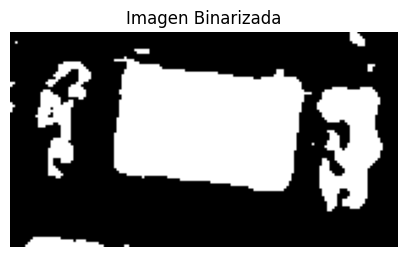

In [540]:
 # Aplicar desenfoque para reducir ruido
imagen_suavizada = cv2.GaussianBlur(imagen_ajustada, (3, 3), 0)

# Aplicar umbral para binarizar la imagen
#_, umbral = cv2.threshold(imagen_suavizada, 160, 255, cv2.THRESH_BINARY)       #Capacitor café 160 #Leds 243
_, umbral = cv2.threshold(imagen_suavizada, 160 , 255, cv2.THRESH_BINARY)       

# Mostrar la imagen umbralizada
plt.figure(figsize=(5, 5))
plt.imshow(umbral, cmap='gray')
plt.title("Imagen Binarizada")
plt.axis("off")
plt.show()

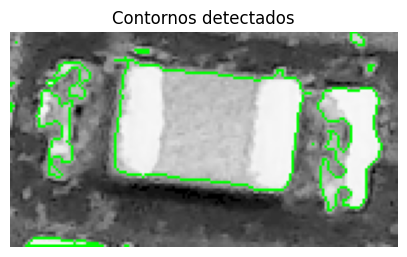

In [541]:
# Encontrar contornos
contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos sobre la imagen en color
imagen_contornos = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
cv2.drawContours(imagen_contornos, contornos, -1, (0, 255, 0), 1)

# Mostrar la imagen con contornos
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
plt.title("Contornos detectados")
plt.axis("off")
plt.show()

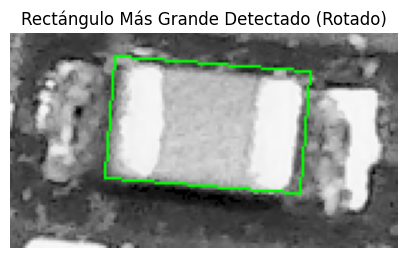

In [542]:
# Encontrar contornos
contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dimensiones de la imagen
alto, ancho = imagen.shape
area_imagen = alto * ancho

# Variable para guardar el rectángulo más grande
rectangulo_mas_grande = None
area_maxima = 0

# Crear copia de la imagen en color para dibujar
imagen_rectangulos = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

# Recorrer los contornos y obtener el rectángulo rotado más grande
for contorno in contornos:
    # Obtener rectángulo rotado
    rect = cv2.minAreaRect(contorno)
    (x, y), (w, h), angulo = rect  # Centro, tamaño y ángulo del rectángulo

    area = w * h  # Calcular el área

    # Validar que el área no sea demasiado grande (evita que seleccione toda la imagen)
    if area < 0.9 * area_imagen and area > area_maxima:
        area_maxima = area
        rectangulo_mas_grande = rect

# Dibujar el rectángulo rotado más grande si se encontró uno
if rectangulo_mas_grande:
    box = cv2.boxPoints(rectangulo_mas_grande)  # Obtener las esquinas del rectángulo
    box = np.intp(box)  # Convertir a enteros
    cv2.drawContours(imagen_rectangulos, [box], 0, (0, 255, 0), 1)

# Mostrar la imagen con el rectángulo más grande
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(imagen_rectangulos, cv2.COLOR_BGR2RGB))
plt.title("Rectángulo Más Grande Detectado (Rotado)")
plt.axis("off")
plt.show()



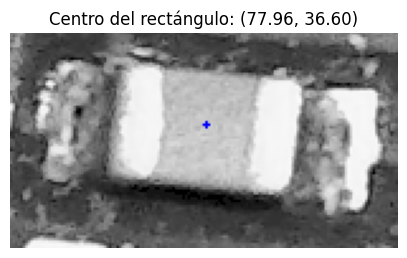

Centro del rectángulo: (77.96, 36.60)


In [543]:
# Extraer el centro del rectángulo más grande
if rectangulo_mas_grande:
    (cx, cy), _, _ = rectangulo_mas_grande

    # Dibujar el centro sobre la imagen
    imagen_centro = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    cv2.circle(imagen_centro, (int(cx), int(cy)), 1, (255, 0, 0), -1)

    # Mostrar la imagen con el centro marcado
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(imagen_centro, cv2.COLOR_BGR2RGB))
    plt.title(f"Centro del rectángulo: ({cx:.2f}, {cy:.2f})")
    plt.axis("off")
    plt.show()

    print(f"Centro del rectángulo: ({cx:.2f}, {cy:.2f})")
else:
    print("No se encontró ningún rectángulo.")

In [544]:
# Extraer la inclinación del rectángulo más grande
if rectangulo_mas_grande:
    _, (w, h), angulo = rectangulo_mas_grande

    # Ajustar el ángulo si es necesario
    if w < h:
        angulo += 90  # Para mantenerlo en el rango de 0° a 90°

    print(f"Inclinación del rectángulo: {angulo:.2f}°")
else:
    print("No se encontró ningún rectángulo.")


Inclinación del rectángulo: 4.61°
